In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 聚类 cluster

聚类是一种无监督学习（Unsupervised Learning）。与之前的使用有标签的训练集拟合某一个假设函数不同，无监督学习的数据是没有任何数据标签的。也就是说，我们的训练集可以写成只有$x^{(1)}$,$x^{(2)}$,…..一直到$x^{(n)}$,没有任何标签$y$。譬如下图，数据看起来可以分成两个分开的点集（称为簇），一个能够找到这些点集的算法，就被称为聚类算法。

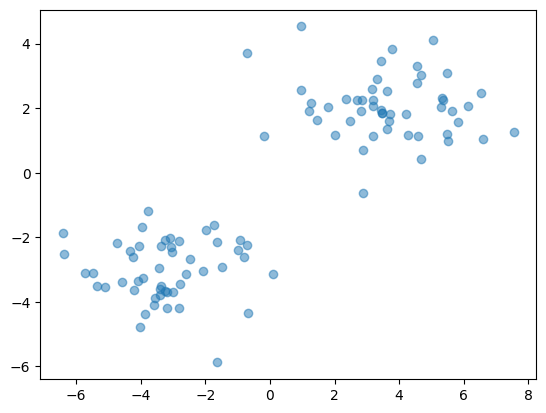

In [35]:
num_samples = 50

centers = [
    (-3.2, -3),
    (3.8, 2),
]

data = []
for i, center in enumerate(centers):
    x1 = np.random.normal(center[0], 1.5, num_samples)
    x2 = np.random.normal(center[1], 1, num_samples)
    for j in range(num_samples):
        data.append([x1[j], x2[j]])

data = np.array(data)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points')

## K-means

K-means是最普及的聚类算法，算法接受一个未标记的数据集，然后将数据聚类成不同的组。K-means是一个迭代算法，假设我们想要将数据聚类成n个组，其方法为:
- 首先选择个随机的点，称为聚类中心（cluster centroids）；
- 对于数据集中的每一个数据，按照距离个中心点的距离，将其与距离最近的中心点关联起来，与同一个中心点关联的所有点聚成一类；
- 计算每一个组的平均值，将该组所关联的中心点移动到平均值的位置。
- 重复步骤2-4直至中心点不再变化。

In [39]:
init_center = data[np.random.choice(data.shape[0], 2, replace=False)]  # 随机选择两个点作为初始中心点
iterations = 100
tolerance = 1e-4

num = 0
for _ in range(iterations):
    distances = np.linalg.norm(data[:, np.newaxis, :] - init_center, axis=2)  # 范数算一下距离，聚类一些相似度计算方式还可以是闵可夫斯基距离，杰卡德相似系数，余弦相似度之类的
    closest_center = np.argmin(distances, axis=1)  # 配每个点到中心点的最近距离对应的索引

    # 更新中心点
    new_center = np.copy(init_center)
    for i in range(len(init_center)):
        new_center[i] = data[closest_center == i].mean(axis=0)

    center_shift = np.linalg.norm(new_center - init_center)
    if center_shift < tolerance:
        break
    
    init_center = new_center
    num += 1

print(init_center, num)

[[-3.23052697 -3.01258445]
 [ 3.66724992  2.0447515 ]] 1


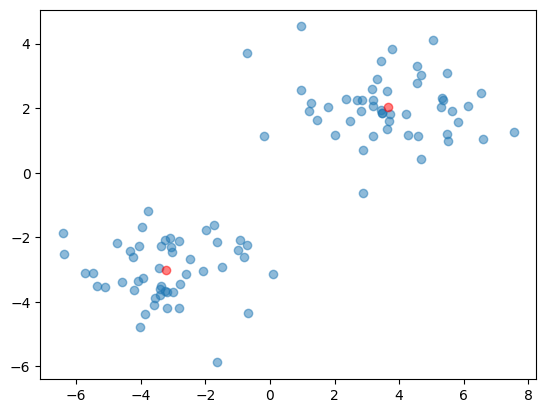

In [40]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points')
plt.scatter(init_center[0][0], init_center[0][1], alpha=0.5, color='red', label='Cluster Center 1')
plt.scatter(init_center[1][0], init_center[1][1], alpha=0.5, color='red', label='Cluster Center 2')

In [48]:
distances = np.linalg.norm(data[:, np.newaxis, :] - init_center, axis=2)
closest_center = np.argmin(distances, axis=1)
closest_center

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
data[closest_center==0]

array([[-3.93344267, -3.25712774],
       [-3.76988367, -1.19018231],
       [-2.81039802, -2.1076515 ],
       [-5.72202296, -3.09657613],
       [-4.57519221, -3.37715702],
       [-3.37883615, -3.50529774],
       [-3.86941592, -4.36267113],
       [-6.41503316, -1.86687297],
       [-3.18494335, -3.70068976],
       [-4.03733388, -4.7683479 ],
       [-2.47864152, -2.65958272],
       [-4.06121302, -2.27075831],
       [-3.5787014 , -4.08835382],
       [-1.64022982, -5.87777873],
       [-3.23521929, -3.66147769],
       [-3.06586657, -2.29407161],
       [-4.09149106, -3.35859784],
       [-3.35854519, -2.26801755],
       [-2.08580643, -3.03636653],
       [-4.33247229, -2.41108578],
       [-3.40742407, -3.77963481],
       [-6.3873804 , -2.52366331],
       [-4.74502825, -2.16611988],
       [-3.9761778 , -1.68620731],
       [-3.41270002, -3.6017086 ],
       [-5.11472032, -3.5471638 ],
       [-0.97773009, -2.39034921],
       [-0.71108504, -2.24106784],
       [-3.19979058,

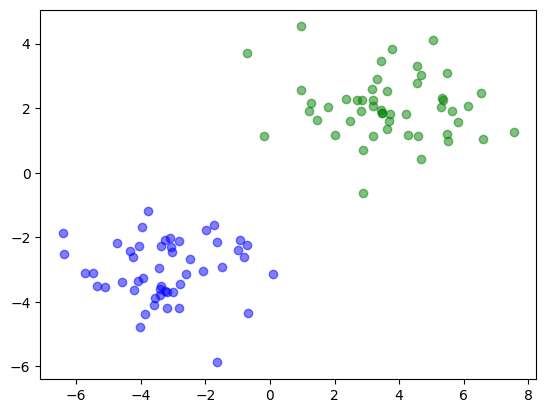

In [54]:
plt.scatter(data[closest_center==0][:, 0], data[closest_center==0][:, 1], alpha=0.5, color='blue', label='Data Points')
plt.scatter(data[closest_center==1][:, 0], data[closest_center==1][:, 1], alpha=0.5, color='green', label='Data Points')

## 选择聚类数
没有所谓最好的选择聚类数的方法，通常是需要根据不同的问题，人工进行选择的。选择的时候思考我们运用K-means算法聚类的动机是什么，然后选择能最好服务于该目的标聚类数。

选择聚类数目的方法时，有一个可能会谈及的方法叫作**肘部法则(Elbow Method)**。
- 改变聚类类别数目的总数K值；
- 然后计算不同K值得成本函数或者计算畸变函数$J$.
- 随着K值的增加，成本函数$J$通常会下降，因为更多的簇能够更好地解释数据；
- 在某个K值处，成本函数开始趋于平稳，不再显著下降，此时曲线表现出一个明显的“肘部”。这一点代表的K是合理的选择，因为再增加更多簇对结果的改善有限。

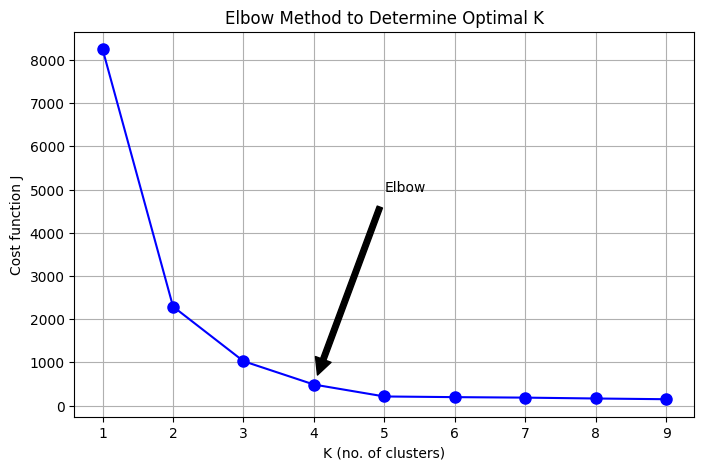

In [57]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成数据集
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# 用不同的 K 值运行 K-means，并计算成本函数
costs = []
K_range = range(1, 10)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)  # Inertia是cost function J 的另一种称法
  
# 绘制成本函数图
plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, 'bo-', markersize=8)
plt.xlabel('K (no. of clusters)')
plt.ylabel('Cost function J')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.xticks(K_range)

# 标记肘部
elbow_point = 4  # 从图中手动选择
plt.annotate('Elbow', xy=(elbow_point, costs[elbow_point-1]), 
             xytext=(elbow_point+1, costs[0]*0.6), 
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### 调节兰德指数（Adjusted Rand Index, ARI）

这是一种用于评估聚类结果与真实分组（ground truth）之间一致性的指标,特别是在比较算例集分组结果时应用于验证的工具之一。
- ARI 值范围为 [-1, 1]，其中 1 表示完全一致，0 表示与随机结果表现相当，负值表示比随机效果还差。


$$
\text{ARI} = \frac{\sum_{ij} \binom{n_{ij}}{2} - \left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2}}{\frac{1}{2} \left[ \sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2} \right] - \left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2}}
$$

#### 公式中涉及的变量解释：

- $ n_{ij} $是分配到簇$ X_i $和$ Y_j $的数据点数量。
- $ a_i $是分配到簇$ X_i $的数据点总数：$ a_i = \sum_{j} n_{ij}$ 。
- $ b_j $是分配到簇$ Y_j $的数据点总数：$ b_j = \sum_{i} n_{ij}$。
- $ n $是数据集中元素的总数。

#### 解析：

- $\binom{n}{2}$是组合数，表示从$ n $个元素中任选 2 个的组合数。公式整体用于匹配分类和实际标签的点对。
- 分子部分为已观察到的一致性减去随机一致性的期望值。
- 分母部分调整正常化该数量，以便返回的结果范围在 [-1, 1] 之间。


# 降维Dimensionality Reduction

你可能因为种种原因想对数据做降维。
- 譬如，数据压缩允许我们压缩数据，因而使用较少的计算机内存或磁盘空间，也可以用于高性能计算的算法设计。我们将一个三维特征向量降至一个二维的特征向量，**可以将三维向量投射到二维平面上，让所有数据都在同一个平面**，降至二维的特征向量。
- 又如，降维可以把一些数据更好地可视化出来。假使我们有有关于许多不同国家的数据，每一个特征向量都有50个特征（如GDP，人均GDP，平均寿命等）。如果要将这个50维的数据可视化是不可能的，使用降维的方法将其降至2维，我们便可以将其可视化（横轴和纵轴是某一维度特征，数据点代表不同国家），但是这样降维的算法只负责减少维数，新产生的特征的意义就必须由我们自己去发现。

## 主成分分析
主成分分析(PCA)是最常见的降维算法。**在PCA中，我们要做的是找到一个方向向量（Vector direction），当我们把所有的数据都投射到该向量上时，我们希望投射平均均方误差能尽可能地小。**
- PCA将个特征降维到个，可以用来进行数据压缩，如果100维的向量最后可以用10维来表示，那么压缩率为90%。同样图像处理领域的KL变换使用PCA做图像压缩。但PCA 要保证降维后，还要保证数据的特性损失最小；
- PCA技术的一大好处是对数据进行降维的处理。我们可以对新求出的“主元”向量的重要性进行排序，根据需要取前面最重要的部分，将后面的维数省去；
- PCA技术的一个很大的优点是，它是完全无参数限制的。在PCA的计算过程中完全不需要人为的设定参数或是根据任何经验模型对计算进行干预，最后的结果只与数据相关，与用户是独立的。

###  PCA步骤

- 均值归一化
- 计算协方差矩阵
- 计算协方差矩阵的特征向量

### 选择主成分的数量

- 这是衡量误差的公式--**平均均方误差**：

$\frac{1}{m} \sum_{i=1}^{m} \|\vec{x}^{(i)} - \vec{x}_{\text{approx}}^{(i)}\|^2$

其中$\vec{x}^{(i)} $是原始的数据点，$\vec{x}_{\text{approx}}^{(i)}$是降维后重构的数据点。

​
- **保留方差比例**：
$\frac{\sum_{i=1}^{k} S_{ii}}{\sum_{i=1}^{n} S_{ii}}$

这里S是特征值的对角矩阵，k是选择的主成分的数量，n是数据的原始维度。这公式表示选择前k个主成分后的信息量占原数据的比例。

- 通常我们希望保留99%或95%的原数据方差
